# Data exploratie: een primer
Een eerste kennismaking met Python en Pandas
- inlezen
- verwijder regels met ontbrekende waarden
- selecteren (onderdelen van een DataFrame)
- filteren
- sorteren
- groeperen
- toevoegen
- verwijderen
- visualiseren

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import path

### Inlezen

In [69]:
# Windows

# Pas data_dir hier aan naar de locatie op jouw eigen computer!
data_dir = r'C:\Users\pmarres\Documents\projects\python_cursus_202106\data'
filename = 'cursisten_cursus_7juni.xlsx'
full_path = path.join(data_dir, filename)
full_path

# Voor Linux / MacOS gebruikers --> forward slashes en raw string niet nodig, bijvoorbeeld:
# data_dir = '/home/pieter/Documents/projects/python_cursus_202102/data'

'C:\\Users\\pmarres\\Documents\\projects\\python_cursus_202106\\data\\cursisten_cursus_7juni.xlsx'

In [70]:
data = pd.read_excel(full_path, sheet_name='Sheet1')
data

,voornaam,achternaam,tussenvoegsles,geslacht,leeftijd,woonplaats,werkgever,linkedin,foto
0,Milinha,Bleijswijk,van,V,NaN,NaN,Nationale Nederlanden,False,False
1,Rodie,Blomsma,NaN,m,NaN,NaN,TKP Pensioen,True,True
2,Renger,Hartog,NaN,M,NaN,NaN,Rovas Actuarieel Support,True,True
3,Dion,Heijnen,NaN,M,39.0,Amsterdam,Heynen Systems B.V.,True,False
4,Norbert,Hemel,van den,M,52.0,Zoetermeer,Onderlinge 's Gravenhage,True,True
5,Nathalie,Hiwat,NaN,V,36.0,Arnhem,FinQuant Consultancy,True,True
6,Jeffrey,Holtrop,NaN,M,NaN,NaN,AEGON,True,False
7,Pieter,Katerberg,NaN,M,43.0,Almere,House of Bèta,True,True
8,Aldo,Klein,NaN,M,NaN,NaN,Nationale Nederlanden,True,True
9,Robert,Kollen,NaN,M,NaN,NaN,TKP Pensioen,True,True


In [71]:
selected_columns = ['voornaam', 'geslacht', 'leeftijd', 'woonplaats']
data = data[selected_columns]
data

,voornaam,geslacht,leeftijd,woonplaats
0,Milinha,V,NaN,NaN
1,Rodie,m,NaN,NaN
2,Renger,M,NaN,NaN
3,Dion,M,39.0,Amsterdam
4,Norbert,M,52.0,Zoetermeer
5,Nathalie,V,36.0,Arnhem
6,Jeffrey,M,NaN,NaN
7,Pieter,M,43.0,Almere
8,Aldo,M,NaN,NaN
9,Robert,M,NaN,NaN


### Verwijder regels met ontbrekende waarden

In [72]:
df = data[~data.isna().any(axis=1)].copy()
df

,voornaam,geslacht,leeftijd,woonplaats
3,Dion,M,39.0,Amsterdam
4,Norbert,M,52.0,Zoetermeer
5,Nathalie,V,36.0,Arnhem
7,Pieter,M,43.0,Almere
13,Sauw-Fou,M,42.0,Vleuten


### Selecteren

In [73]:
# selecteer rij bij rijnummer (begint bij 0!)
df.iloc[2]

voornaam      Nathalie
geslacht             V
leeftijd            36
woonplaats      Arnhem
Name: 5, dtype: object

In [74]:
# selecteer rij index
df.loc[4]

voornaam         Norbert
geslacht               M
leeftijd              52
woonplaats    Zoetermeer
Name: 4, dtype: object

In [75]:
# selecteer kolommen
df[['voornaam', 'geslacht']]

,voornaam,geslacht
3,Dion,M
4,Norbert,M
5,Nathalie,V
7,Pieter,M
13,Sauw-Fou,M


In [77]:
# selecteer cel
df.loc[4, 'voornaam']

'Norbert'

### Filteren

In [78]:
# Females only
df[df.geslacht == 'V']

,voornaam,geslacht,leeftijd,woonplaats
5,Nathalie,V,36.0,Arnhem


In [79]:
# Old and wise
df[df.leeftijd > 50]

,voornaam,geslacht,leeftijd,woonplaats
4,Norbert,M,52.0,Zoetermeer


### Sorteren

In [80]:
df.sort_values('woonplaats')

,voornaam,geslacht,leeftijd,woonplaats
7,Pieter,M,43.0,Almere
3,Dion,M,39.0,Amsterdam
5,Nathalie,V,36.0,Arnhem
13,Sauw-Fou,M,42.0,Vleuten
4,Norbert,M,52.0,Zoetermeer


### Groeperen

In [81]:
df.groupby('geslacht').leeftijd.mean()

geslacht
M    44.0
V    36.0
Name: leeftijd, dtype: float64

In [82]:
df.groupby('geslacht').leeftijd.min()

geslacht
M    39.0
V    36.0
Name: leeftijd, dtype: float64

In [83]:
df.groupby('geslacht').leeftijd.agg(['mean', 'min', 'max', 'std'])

,mean,min,max,std
geslacht,,,,
M,44.0,39.0,52.0,5.597619
V,36.0,36.0,36.0,NaN


### Toevoegen

In [84]:
df['leeftijd_na_1_jaar'] = df.leeftijd + 1 
df

,voornaam,geslacht,leeftijd,woonplaats,leeftijd_na_1_jaar
3,Dion,M,39.0,Amsterdam,40.0
4,Norbert,M,52.0,Zoetermeer,53.0
5,Nathalie,V,36.0,Arnhem,37.0
7,Pieter,M,43.0,Almere,44.0
13,Sauw-Fou,M,42.0,Vleuten,43.0


### Verwijderen

In [86]:
df.drop(3)

,voornaam,geslacht,leeftijd,woonplaats,leeftijd_na_1_jaar
4,Norbert,M,52.0,Zoetermeer,53.0
5,Nathalie,V,36.0,Arnhem,37.0
7,Pieter,M,43.0,Almere,44.0
13,Sauw-Fou,M,42.0,Vleuten,43.0


In [87]:
df.drop('woonplaats', axis=1)

,voornaam,geslacht,leeftijd,leeftijd_na_1_jaar
3,Dion,M,39.0,40.0
4,Norbert,M,52.0,53.0
5,Nathalie,V,36.0,37.0
7,Pieter,M,43.0,44.0
13,Sauw-Fou,M,42.0,43.0


### Visualiseren

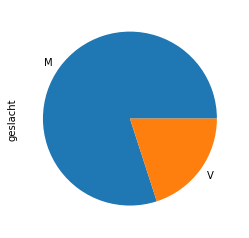

In [88]:
df.geslacht.value_counts().plot(kind='pie')

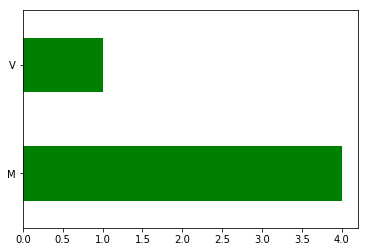

In [89]:
df.geslacht.value_counts().plot(kind='barh', color='green')

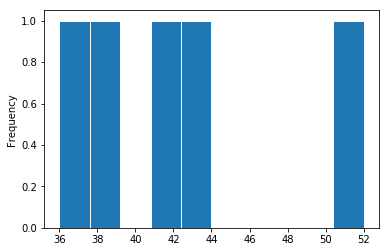

In [90]:
df.leeftijd.plot(kind='hist', edgecolor='white')

In [91]:
# nu jij!
# maak een barchart die het aantal cursisten geeft per woonplaats, gesorteerd van groot naar klein
